In this notebook I am going to use machine learning algorithm for model creation.<br>
I am going to use two machine learning algorithms:
1. Random Forest Classifier
2. Gradient Boosting Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Feature selection using Random Forest and Gradient Boosting
Here I am going to select important features from the dataset for classification with the help of Random Forest and Gradient Boosting classification algorithms. I wll train a model using these algorithms and get feature importance score for each features and according to feature importance score I will select features

In [2]:
data = pd.read_csv("E:/Venu/aaic assignments/Venu_CS2/data/df_clean.csv")

In [3]:
data.head()

,is_original_content,num_comments,over_18,subreddit_subscribers,upvote_ratio,thumbnail_height,thumbnail_width,score,Sentiment_Score,text,...,envelope,comic_book,digital_clock,menu,jigsaw_puzzle,screen,monitor,scoreboard,book_jacket,web_site
0,0,4,0,1396025,1.0,140,140,7.163196e-07,0.48,whatev,...,0,0,1,0,0,0,0,1,0,1
1,0,4,0,4363172,1.0,140,140,2.291911e-07,0.50,NaN,...,0,0,1,0,0,0,0,1,0,1
2,0,2,0,14613900,1.0,140,140,6.842800e-08,0.50,yourselfon choci,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,14629522,1.0,131,140,6.835493e-08,0.10,becau stonk massiv wallstreetbet badredditor b...,...,0,0,0,0,0,0,0,0,1,1
4,0,1,0,14603384,1.0,121,140,6.847728e-08,0.46,guyswhen today happen januari first shine,...,0,0,0,0,0,0,0,0,1,1


In [4]:
'''
during object detection in image I have exteacted 3 objects with their respective probabilities. The probability values
are stored in a list and list is in the form of string. SO I am going to convert them back to list and will make three
different features for these probabilities.
'''

#converting lists of string type to list
from ast import literal_eval
data['img_feature_pred'] = data['img_feature_pred'].apply(literal_eval)

In [5]:
#getting probabitity values in three different lists to make them as seperate features
image_feature_pred_val_1 = []
image_feature_pred_val_2 = []
image_feature_pred_val_3 = []
for i in data['img_feature_pred']:
  image_feature_pred_val_1.append(i[0])
  image_feature_pred_val_2.append(i[1])
  image_feature_pred_val_3.append(i[2])

In [6]:
#creating features for probability values
data['img_feature_pred_1'] = image_feature_pred_val_1
data['img_feature_pred_2'] = image_feature_pred_val_2
data['img_feature_pred_3'] = image_feature_pred_val_3

Since our project is to predict the dankness of the meme and it will be done before posting the meme on social networking sites. So, before posting data such as num_comments, upvote_ratio, score etc will not be available for the post and also it will be good if we predict the dankness of memes irrespective of subscribers count on the page. So, I am going to drop those features.

In [7]:
#dropping features as discussed above
data.drop(['img_feature_pred','text','is_original_content','num_comments','upvote_ratio','score','subreddit_subscribers'], axis=1, inplace=True)

In [8]:
#seperating dependent and independent features
target = data['dank_or_not']
input = data.drop(['dank_or_not'], axis=1)

In [9]:
#splitting the dataset in train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(input,target, test_size=0.2)

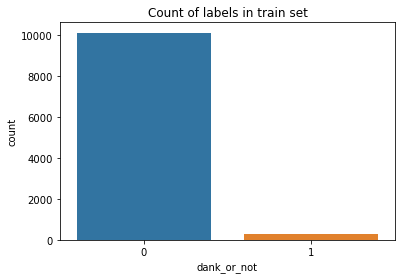

In [11]:
#checking for ratio of labels in train dataset
sns.countplot(y_train)
plt.title('Count of labels in train set')
plt.show()

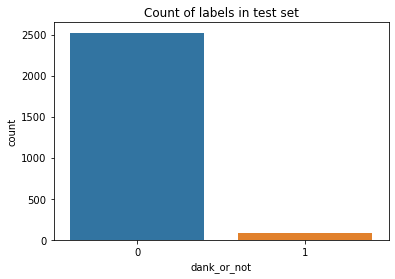

In [12]:
#checking for ratio of labels in test dataset
sns.countplot(y_test)
plt.title('Count of labels in test set')
plt.show()

In [53]:
pip install -U imbalanced-learn

Ratio of labels in both train and test set is same and imbalanced.

In [32]:
#importing libraries to train models and get metrics values
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, make_scorer
from sklearn.metrics import roc_auc_score, confusion_matrix

In [15]:
#parameter value to perform gridsearch cv
parameters = {'n_estimators' : [50, 100, 500]}
#using random forest classifier to get feature importance
Random_forest = RandomForestClassifier()
RF_clf = GridSearchCV(Random_forest, parameters , cv=3, scoring='roc_auc') 

In [16]:
RF_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 500]}, scoring='roc_auc')

In [17]:
RF_clf.best_params_

{'n_estimators': 500}

In [18]:
R_F = RandomForestClassifier(n_estimators=RF_clf.best_params_['n_estimators'])
R_F.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [19]:
#saving feature name and their corresponding importance of random forest in a dictionary
RF_imp_fea = {}
for fea, imp in zip(X_train.columns, R_F.feature_importances_):
	RF_imp_fea[fea] = imp

#sorting the dictionary
RF_imp_fea = dict(sorted(RF_imp_fea.items(), key=lambda item: item[1]))

In [20]:
#using gradient boosting classifier to get feature importance
grad_boosting = GradientBoostingClassifier()
GB_clf = GridSearchCV(grad_boosting, parameters , cv=3, scoring='roc_auc') 

In [21]:
GB_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [50, 100, 500]}, scoring='roc_auc')

In [22]:
GB_clf.best_params_

{'n_estimators': 50}

In [23]:
grad_boosting_ = GradientBoostingClassifier(n_estimators=GB_clf.best_params_['n_estimators'])
grad_boosting_.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [24]:
#saving feature name and their corresponding importance of gradient boosting in a dictionary
GB_imp_fea = {}
for fea, imp in zip(X_train.columns, grad_boosting_.feature_importances_):
	GB_imp_fea[fea] = imp

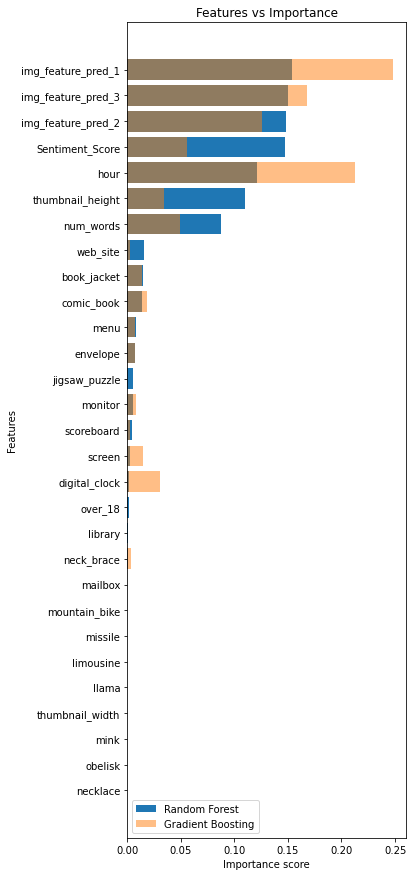

In [25]:
# plot feature importance
plt.figure(figsize=(5,15))
pyplot.barh(list(RF_imp_fea.keys()), RF_imp_fea.values())
pyplot.barh(list(GB_imp_fea.keys()), GB_imp_fea.values(),alpha=0.5)
plt.title('Features vs Importance')
plt.xlabel('Importance score')
plt.ylabel('Features')
plt.legend(['Random Forest', 'Gradient Boosting'])
pyplot.show()

Here we can see that both the models have shown almost same feature importance with some variability. 
* Some of the features like thumbnail height, number of words, hour of posting the meme and sentiment score are playing major role in classifying memes.
* Hue, saturation and value of the images are playing important role.
* Colors which are extracted from the meme images such as gray, white, faded colors, black, dark blue, goldish, light blue, brown, yellow, dark cyan, light orange, dark green, cyan, off-white, dark red, dark orange and light red are important.
* Very few objects which were extracted from images such as website, book jacket, packet and mud turtle are important but their probabilities (three objects of an image) are very important.

<br>
Now, extracting important fatures from the dataset to train the model


In [10]:
df_imp_feature = data[['img_feature_pred_1','img_feature_pred_2','img_feature_pred_3','Sentiment_Score','hour',
    'num_words','thumbnail_height','web_site','envelope','library','comic_book','menu','jigsaw_puzzle','scoreboard','monitor','screen','digital_clock','mountain_bike', 'book_jacket','dank_or_not']]

In [11]:
#saving dataset containing important features
df_imp_feature.to_csv('df_imp_feature.csv', index=False)

# **Model creation**

In [12]:
data1 = pd.read_csv("E:/Venu/aaic assignments/Venu_CS2/data/df_imp_feature.csv")

In [13]:
data1.shape

(12995, 20)

In [14]:
data1.head()

,img_feature_pred_1,img_feature_pred_2,img_feature_pred_3,Sentiment_Score,hour,num_words,thumbnail_height,web_site,envelope,library,comic_book,menu,jigsaw_puzzle,scoreboard,monitor,screen,digital_clock,mountain_bike,book_jacket,dank_or_not
0,0.059350,0.047494,0.034131,0.48,2,1,140.0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,0.059350,0.047494,0.034131,0.50,12,0,140.0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,0.067653,0.064695,0.056322,0.50,16,2,140.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.984316,0.004351,0.003388,0.10,14,6,131.0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.864688,0.029701,0.003821,0.46,6,6,121.0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
y = data1['dank_or_not']
X = data1.drop(['dank_or_not'], axis=1)

In [16]:
#splitting the dataset in train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [17]:
#parameter value to perform gridsearch cv
parameters = {'n_estimators' : [50, 100, 500]}

### Random Froest without sampling

In [34]:
#using random forest classifier to get feature importance
RF_sam = RandomForestClassifier()
RF_clf_sam = GridSearchCV(RF_sam, parameters , cv=3, scoring='roc_auc') 

In [35]:
#training the model
RF_clf_sam.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 500]}, scoring='roc_auc')

In [36]:
#predicting values and probabilities
y_sam_prob_rf = RF_clf_sam.predict(X_test)
y_sam_prob_rf = RF_clf_sam.predict_proba(X_test)
y_sam_prob_rf = y_sam_prob_rf[:,1]    #getting probability for only '1' value

In [37]:
y_sam_prob_rf = np.where(y_sam_prob_rf > 0.5, 1, 0)

In [38]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_sam_prob_rf).ravel()

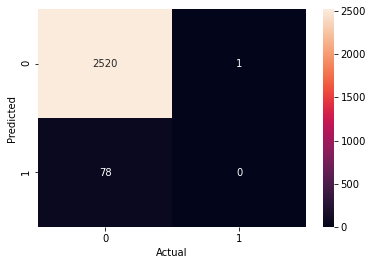

In [39]:
#plotting confusion matrix
RF_cfn_m = confusion_matrix(y_test, y_sam_prob_rf)
sns.heatmap(RF_cfn_m, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [40]:
#various metrics values of the model
acc_RF = accuracy_score(y_test, y_sam_prob_rf).round(4)
Precision_RF = precision_score(y_test, y_sam_prob_rf).round(4)
Recall_RF = recall_score(y_test, y_sam_prob_rf).round(4)
Fl_RF = f1_score(y_test, y_sam_prob_rf).round(4)
RF_sensit = (tp_rf/(tp_rf+fn_rf)).round(4)
RF_speci = (tn_rf/(tn_rf+fp_rf)).round(4)
roc_auc_RF = roc_auc_score(y_test, y_sam_prob_rf).round(4)

In [41]:
print('accuracy score : ',acc_RF)
print('precision      : ',Precision_RF)
print('recall         : ',Recall_RF)
print('F1 score       : ',Fl_RF)
print('sensitivity    : ',RF_sensit)
print('specificity    : ',RF_speci)
print('AUC            : ',roc_auc_RF)

accuracy score :  0.9696
precision      :  0.0
recall         :  0.0
F1 score       :  0.0
sensitivity    :  0.0
specificity    :  0.9996
AUC            :  0.4998


### Gradient Boost without sampling

In [42]:
#using gradient boosting classifier to get feature importance
Grad_Boosting = GradientBoostingClassifier()
GB_clf = GridSearchCV(Grad_Boosting, parameters , cv=3, scoring='roc_auc') 

In [43]:
#training the model
GB_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [50, 100, 500]}, scoring='roc_auc')

In [44]:
#predicting values and probabilities
y_sam_pred_gb = GB_clf.predict(X_test)
y_sam_prob_gb = GB_clf.predict_proba(X_test)
y_sam_prob_gb = y_sam_prob_gb[:,1]    #getting probability for only '1' value

In [45]:
y_sam_prob_gb = np.where(y_sam_prob_gb > 0.5, 1, 0)

In [46]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_gb, fp_gb, fn_gb, tp_gb = confusion_matrix(y_test, y_sam_prob_gb).ravel()

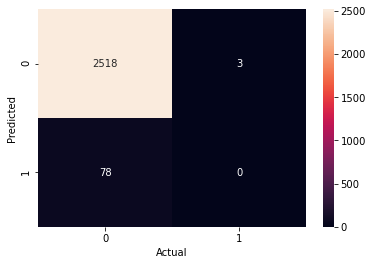

In [47]:
#plotting confusion matrix
cm_gb = confusion_matrix(y_test, y_sam_prob_gb)
sns.heatmap(cm_gb, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [48]:
#various metrics values of the model
acc_GB = accuracy_score(y_test, y_sam_prob_gb).round(4)
Precision_GB = precision_score(y_test, y_sam_prob_gb).round(4)
Recall_GB = recall_score(y_test, y_sam_prob_gb).round(4)
Fl_GB = f1_score(y_test, y_sam_prob_gb).round(4)
GB_sensit = (tp_rf/(tp_rf+fn_rf)).round(4)
GB_speci = (tn_rf/(tn_rf+fp_rf)).round(4)
roc_auc_GB = roc_auc_score(y_test, y_sam_prob_gb).round(4)

In [49]:
print('accuracy score : ',acc_GB)
print('precision      : ',Precision_GB)
print('recall         : ',Recall_GB)
print('F1 score       : ',Fl_GB)
print('sensitivity    : ',GB_sensit)
print('specificity    : ',GB_speci)
print('AUC            : ',roc_auc_GB)

accuracy score :  0.9688
precision      :  0.0
recall         :  0.0
F1 score       :  0.0
sensitivity    :  0.0
specificity    :  0.9996
AUC            :  0.4994


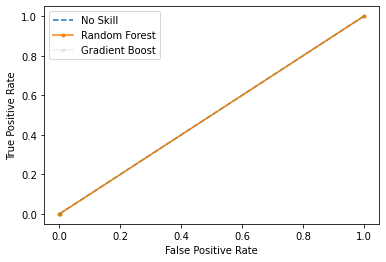

In [50]:
'''Plotting ROC curve for both Random Forest and Gradient Boosting Classifiers trained on unsampled data'''

#no-skill values
GRF_probs = [0 for _ in range(len(y_test))]
GRF_auc = roc_auc_score(y_test, GRF_probs)

# calculate roc curves
false_pos_rate_ns, true_pos_rate_ns, _ = roc_curve(y_test, GRF_probs)
false_pos_rate_rf, true_pos_rate_rf, _ = roc_curve(y_test, y_sam_prob_rf)
false_pos_rate_gb, true_pos_rate_gb, _ = roc_curve(y_test, y_sam_prob_gb)

# plot the roc curve for the model
pyplot.plot(false_pos_rate_ns, true_pos_rate_ns, linestyle='--', label='No Skill')
pyplot.plot(false_pos_rate_rf, true_pos_rate_rf, marker='.', label='Random Forest')
pyplot.plot(false_pos_rate_gb, true_pos_rate_gb, marker='.', label='Gradient Boost', alpha=0.1)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Up-sampling the train data

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
# transform the dataset
oversample = SMOTE()
X_train_sam, y_train_sam = oversample.fit_resample(X_train, y_train)

### Training Random Forest with upsampled data

In [56]:
#using random forest classifier to get feature importance
RF_us = RandomForestClassifier()
RF_clf_us = GridSearchCV(RF_us, parameters , cv=3, scoring='roc_auc') 

In [57]:
#training the model
RF_clf_us.fit(X_train_sam, y_train_sam)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 500]}, scoring='roc_auc')

In [58]:
#predicting values and probabilities
us_y_pred_rf = RF_clf_us.predict(X_test)
us_y_prob_rf = RF_clf_us.predict_proba(X_test)
us_y_prob_rf = us_y_prob_rf[:,1]    #getting probability for only '1' value

In [61]:
us_y_prob_rf = np.where(us_y_prob_rf > 0.5, 1, 0)

In [62]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_rf_us, fp_rf_us, fn_rf_us, tp_rf_us = confusion_matrix(y_test, us_y_prob_rf).ravel()

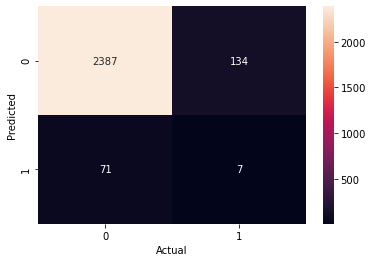

In [63]:
#plotting confusion matrix
us_rf = confusion_matrix(y_test, us_y_prob_rf)
sns.heatmap(us_rf, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [64]:
#various metrics values of the model
us_acc_RF = accuracy_score(y_test, us_y_prob_rf).round(4)
us_Precision_RF = precision_score(y_test, us_y_prob_rf).round(4)
us_Recall_RF = recall_score(y_test, us_y_prob_rf).round(4)
us_Fl_RF = f1_score(y_test, us_y_prob_rf).round(4)
us_RF_sensit = (tp_rf/(tp_rf+fn_rf)).round(4)
us_RF_speci = (tn_rf/(tn_rf+fp_rf)).round(4)
us_roc_auc_RF = roc_auc_score(y_test, us_y_prob_rf).round(4)

In [65]:
print('accuracy score : ',us_acc_RF)
print('precision      : ',us_Precision_RF)
print('recall         : ',us_Recall_RF)
print('F1 score       : ',us_Fl_RF)
print('sensitivity    : ',us_RF_sensit)
print('specificity    : ',us_RF_speci)
print('AUC            : ',us_roc_auc_RF)

accuracy score :  0.9211
precision      :  0.0496
recall         :  0.0897
F1 score       :  0.0639
sensitivity    :  0.0
specificity    :  0.9996
AUC            :  0.5183


### Training Gradient Boosting with upsampled data

In [66]:
#using gradient boosting classifier to get feature importance
US_GB = GradientBoostingClassifier()
US_clf_gb = GridSearchCV(US_GB, parameters , cv=3, scoring='roc_auc') 

In [67]:
#training the model
US_clf_gb.fit(X_train_sam,y_train_sam)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [50, 100, 500]}, scoring='roc_auc')

In [68]:
#predicting values and probabilities
us_y_pred_gb = US_clf_gb.predict(X_test)
us_y_prob_gb = US_clf_gb.predict_proba(X_test)
us_y_prob_gb = us_y_prob_gb[:,1]    #getting probability for only '1' value

In [69]:
us_y_prob_gb = np.where(us_y_prob_gb > 0.5, 1, 0)

In [70]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_gb_us, fp_gb_us, fn_gb_us, tp_gb_us = confusion_matrix(y_test, us_y_prob_gb).ravel()

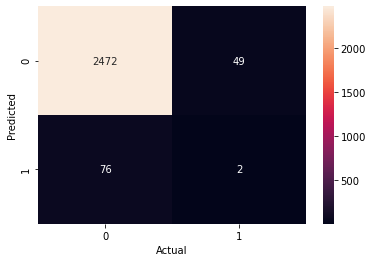

In [71]:
#plotting confusion matrix
us_cm = confusion_matrix(y_test, us_y_prob_gb)
sns.heatmap(us_cm, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [72]:
#various metrics values of the model
us_acc_GB = accuracy_score(y_test, us_y_prob_gb).round(4)
us_Precision_GB = precision_score(y_test, us_y_prob_gb).round(4)
us_Recall_GB = recall_score(y_test, us_y_prob_gb).round(4)
us_Fl_GB = f1_score(y_test, us_y_prob_gb).round(4)
us_GB_sensit = (tp_rf/(tp_rf+fn_rf)).round(4)
us_GB_speci = (tn_rf/(tn_rf+fp_rf)).round(4)
us_roc_auc_GB = roc_auc_score(y_test, us_y_prob_gb).round(4)

In [73]:
print('accuracy score : ',us_acc_GB)
print('precision      : ',us_Precision_GB)
print('recall         : ',us_Recall_GB)
print('F1 score       : ',us_Fl_GB)
print('sensitivity    : ',us_GB_sensit)
print('specificity    : ',us_GB_speci)
print('AUC            : ',us_roc_auc_GB)

accuracy score :  0.9519
precision      :  0.0392
recall         :  0.0256
F1 score       :  0.031
sensitivity    :  0.0
specificity    :  0.9996
AUC            :  0.5031


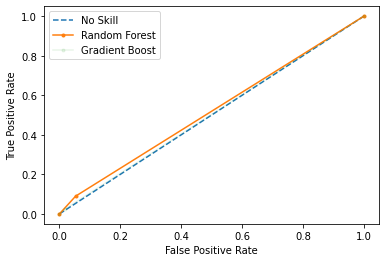

In [74]:
'''Plotting ROC curve for both Random Forest and Gradient Boosting Classifiers trained on unsampled data'''

#no-skill values
us_GRF_probs = [0 for _ in range(len(y_test))]
us_GRF_auc = roc_auc_score(y_test, us_GRF_probs)

# calculate roc curves
false_pos_rate_ns, true_pos_rate_ns, _ = roc_curve(y_test, us_GRF_probs)
false_pos_rate_rf, true_pos_rate_rf, _ = roc_curve(y_test, us_y_prob_rf)
false_pos_rate_gb, true_pos_rate_gb, _ = roc_curve(y_test, us_y_prob_gb)

# plot the roc curve for the model
pyplot.plot(false_pos_rate_ns, true_pos_rate_ns, linestyle='--', label='No Skill')
pyplot.plot(false_pos_rate_rf, true_pos_rate_rf, marker='.', label='Random Forest')
pyplot.plot(false_pos_rate_gb, true_pos_rate_gb, marker='.', label='Gradient Boost', alpha=0.1)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [79]:
! pip install xgboost

  Using cached xgboost-1.5.0-py3-none-win_amd64.whl (106.6 MB)


In [19]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
#from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

Logistic Regression

In [55]:
model_lg = SGDClassifier(alpha=0.001,loss='log',penalty='l2',random_state=24)
model_lg.fit(X_train_sam, y_train_sam)

SGDClassifier(alpha=0.001, loss='log', random_state=24)

In [56]:
#predicting values and probabilities
y_predict = model_lg.predict(X_test)
y_predict = model_lg.predict_proba(X_test)
y_predict = y_predict[:,1]    #getting probability for only '1' value

In [57]:
y_predict = np.where(y_predict > 0.5, 1, 0)

In [58]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_lg, fp_lg, fn_lg, tp_lg = confusion_matrix(y_test, y_predict).ravel()

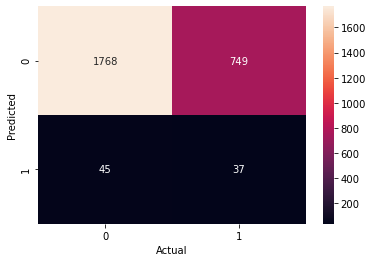

In [59]:
#plotting confusion matrix
lg_cm = confusion_matrix(y_test, y_predict)
sns.heatmap(lg_cm, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [60]:
#various metrics values of the model
acc_lg = accuracy_score(y_test, y_predict).round(4)
Precision_lg = precision_score(y_test, y_predict).round(4)
Recall_lg = recall_score(y_test, y_predict).round(4)
Fl_lg = f1_score(y_test, y_predict).round(4)
sensit_lg = (tp_lg/(tp_lg+fn_lg)).round(4)
speci_lg = (tn_lg/(tn_lg+fp_lg)).round(4)
roc_auc_lg = roc_auc_score(y_test, y_predict).round(4)

In [61]:
print('accuracy score : ',acc_lg)
print('precision      : ',Precision_lg)
print('recall         : ',Recall_lg)
print('F1 score       : ',Fl_lg)
print('sensitivity    : ',sensit_lg)
print('specificity    : ',speci_lg)
print('AUC            : ',roc_auc_lg)

accuracy score :  0.6945
precision      :  0.0471
recall         :  0.4512
F1 score       :  0.0853
sensitivity    :  0.4512
specificity    :  0.7024
AUC            :  0.5768


# **Decision Tree**

In [24]:
DT = DecisionTreeClassifier()
max_depth=[1,5,10,50]
min_samples_split=[5,10,100,500]
parameters = {'max_depth':max_depth,'min_samples_split':min_samples_split}
clf_dt = RandomizedSearchCV(DT, parameters, cv= 10,return_train_score=True,verbose=2)
clf_dt.fit(X_train_sam, y_train_sam)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=100; total time=   0.0s
[CV] END ................max_depth=10, min_samples_split=500; total time=   0.0s
[CV] END ................max_depth=10, min_sam

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [1, 5, 10, 50],
                                        'min_samples_split': [5, 10, 100, 500]},
                   return_train_score=True, verbose=2)

In [25]:
print(clf_dt.best_estimator_)

DecisionTreeClassifier(max_depth=50, min_samples_split=100)


In [26]:
clf_best=DecisionTreeClassifier(max_depth=50, min_samples_split=100)
clf_best.fit(X_train_sam, y_train_sam)

DecisionTreeClassifier(max_depth=50, min_samples_split=100)

In [27]:
#predicting values and probabilities
y_predict_dt = clf_dt.predict(X_test)
y_predict_dt = clf_dt.predict_proba(X_test)
y_predict_dt = y_predict_dt[:,1]    #getting probability for only '1' value

In [28]:
y_predict_dt = np.where(y_predict_dt > 0.5, 1, 0)

In [29]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_test, y_predict_dt).ravel()

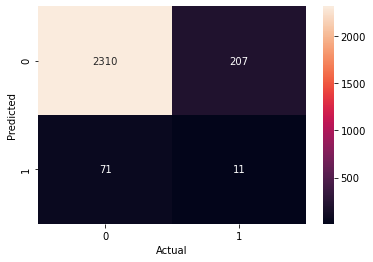

In [30]:
#plotting confusion matrix
dt_cm = confusion_matrix(y_test, y_predict_dt)
sns.heatmap(dt_cm, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [33]:
#various metrics values of the model
acc_dt = accuracy_score(y_test, y_predict_dt).round(4)
Precision_dt = precision_score(y_test, y_predict_dt).round(4)
Recall_dt = recall_score(y_test, y_predict_dt).round(4)
Fl_dt = f1_score(y_test, y_predict_dt).round(4)
sensit_dt = (tp_dt/(tp_dt+fn_dt)).round(4)
speci_dt = (tn_dt/(tn_dt+fp_dt)).round(4)
roc_auc_dt = roc_auc_score(y_test, y_predict_dt).round(4)

In [34]:
print('accuracy score : ',acc_dt)
print('precision      : ',Precision_dt)
print('recall         : ',Recall_dt)
print('F1 score       : ',Fl_dt)
print('sensitivity    : ',sensit_dt)
print('specificity    : ',speci_dt)
print('AUC            : ',roc_auc_dt)

accuracy score :  0.893
precision      :  0.0505
recall         :  0.1341
F1 score       :  0.0733
sensitivity    :  0.1341
specificity    :  0.9178
AUC            :  0.526


# XGBoost Tree

In [35]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
model_xgb=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'min_child_weight':[1,4,7],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
model_xgb=RandomizedSearchCV(model_xgb,param_distributions=prams,verbose=10,n_jobs=-1,cv=5)
model_xgb.fit(X_train_sam,y_train_sam)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[19:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [36]:
print(model_xgb.best_params_)

{'subsample': 0.5, 'n_estimators': 2000, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.3}


In [37]:
model_xgb =XGBClassifier(subsample=0.5,n_estimators=2000,min_child_weight=1,max_depth=10,learning_rate=0.05,colsample_bytree=0.3)
model_xgb.fit(X_train_sam,y_train_sam)

[19:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [38]:
#predicting values and probabilities
y_predict_xgb = model_xgb.predict(X_test)
y_predict_xgb = model_xgb.predict_proba(X_test)
y_predict_xgb= y_predict_xgb[:,1]    #getting probability for only '1' value

In [39]:
y_predict_xgb = np.where(y_predict_xgb > 0.5, 1, 0)

In [40]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_test, y_predict_xgb).ravel()

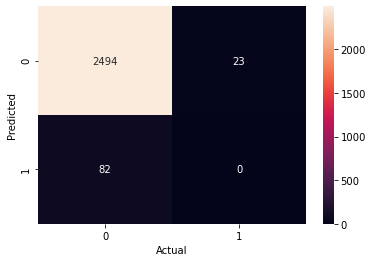

In [41]:
#plotting confusion matrix
xgb_cm = confusion_matrix(y_test, y_predict_xgb)
sns.heatmap(xgb_cm, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [42]:
#various metrics values of the model
acc_xgb = accuracy_score(y_test, y_predict_xgb).round(4)
Precision_xgb = precision_score(y_test, y_predict_xgb).round(4)
Recall_xgb = recall_score(y_test, y_predict_xgb).round(4)
Fl_xgb = f1_score(y_test, y_predict_xgb).round(4)
sensit_xgb = (tp_xgb/(tp_xgb+fn_xgb)).round(4)
speci_xgb = (tn_xgb/(tn_xgb+fp_xgb)).round(4)
roc_auc_xgb = roc_auc_score(y_test, y_predict_xgb).round(4)

In [43]:
print('accuracy score : ',acc_xgb)
print('precision      : ',Precision_xgb)
print('recall         : ',Recall_xgb)
print('F1 score       : ',Fl_xgb)
print('sensitivity    : ',sensit_xgb)
print('specificity    : ',speci_xgb)
print('AUC            : ',roc_auc_xgb)

accuracy score :  0.9596
precision      :  0.0
recall         :  0.0
F1 score       :  0.0
sensitivity    :  0.0
specificity    :  0.9909
AUC            :  0.4954


From the table we can see that Random Forest is performing better than Gradient Boosting Classifier. The best performing algorithm is Balanced Bagging Classifier which is modified version of the bagged decision tree ensemble that performs random undersampling of the majority class prior to fitting each decision tree.<br><br>
So I am going to save this model in pickle form

In [46]:
import pickle

In [62]:
pickle.dump(clf_dt, open('dankornot_ml.pkl', 'wb'))